In [1]:
from PIL import Image
import numpy as np
import datetime
import os

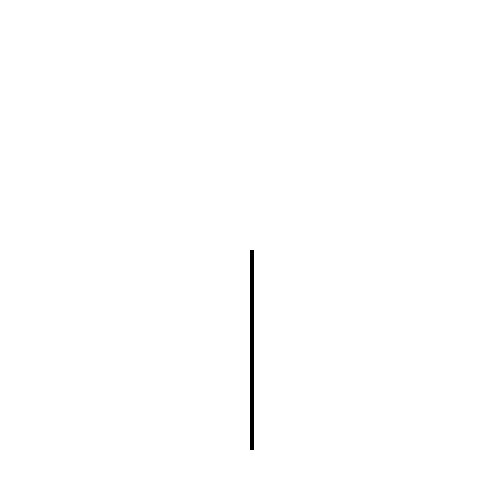

In [2]:
pic1 = Image.open('normal.png')
pic2 = Image.open('not.png')
pic1

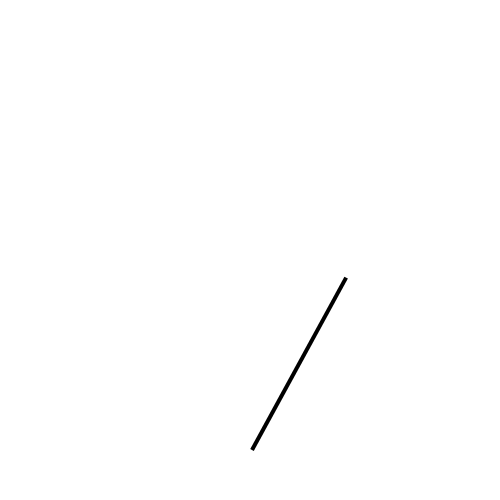

In [3]:
pic2

In [4]:
pix = np.array(pic2.getdata()).reshape(1000, 1000)

data = np.array(list(tuple(pixel) for pixel in pix))

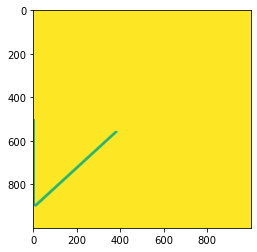

In [5]:
from matplotlib import pyplot as plt
plt.imshow(data, interpolation=None)
plt.show()

In [6]:
import itertools
arr = list(itertools.chain.from_iterable([[ii for n,ii in enumerate(data[j]) if ii not in data[j][:n]] for j in range(1000)]))

In [7]:
a = [ii for n,ii in enumerate(arr) if ii not in arr[:n]]
a.sort()

In [8]:
a

[0,
 3,
 8,
 14,
 22,
 32,
 44,
 54,
 58,
 63,
 71,
 72,
 79,
 87,
 95,
 103,
 110,
 111,
 119,
 127,
 135,
 143,
 151,
 159,
 167,
 175,
 183,
 191,
 197,
 210,
 211,
 215,
 223,
 233,
 235,
 241,
 247,
 252,
 255]

In [9]:
pix = np.array(pic2.getdata()).reshape(1000*1000)



In [10]:
data = np.array([255 if i>200 else 0 for i in pix]).reshape(1000,1000)

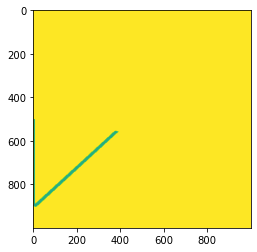

In [11]:
plt.imshow(data)

In [12]:
top = (np.where(data == 0)[0][0],np.where(data == 0)[1][0])
bottom = (np.where(data == 0)[0][-1],np.where(data == 0)[1][-1])

In [13]:
top

(501, 4)

In [14]:
bottom

(901, 14)

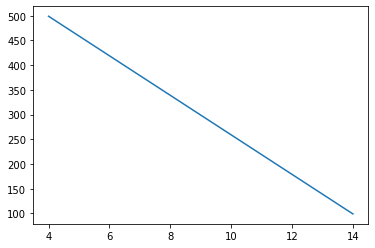

In [15]:
plt.plot([bottom[1],top[1]],[1000 - bottom[0],1000 - top[0]])

slope = ((1000 - top[0]) - (1000 - bottom[0]))/(top[1] - bottom[1])
#slope = (376 - 14)/(555 - 901)

In [16]:
angle = np.rad2deg(np.arctan(slope))

angle

-88.56790381583535

In [17]:
def angle_detection(img):
    pix = np.array(img.getdata()).reshape(1000*1000)
    data = np.array([255 if i>200 else 0 for i in pix]).reshape(1000,1000)
    top = (np.where(data == 0)[0][0],np.where(data == 0)[1][0])
    bottom = (np.where(data == 0)[0][-1],np.where(data == 0)[1][-1])
    slope = ((1000 - top[0]) - (1000 - bottom[0]))/(top[1] - bottom[1])
    angle = np.rad2deg(np.arctan(slope))
    if abs(angle) > 85:
        return False
    else: 
        return True

if angle_detection(pic1) == False and angle_detection(pic2) == True:
    print("Congratulations, your angle detection system works! (Don't get too excited though, it's shit)")

In [18]:
angle_detection(pic1)

False

In [19]:
angle_detection(pic2)

False

In [20]:
def convert_to_bin(img, threshold = 100,shape=(80,72)):
    if type(img) == list or type(img) == np.ndarray:
        return np.array([1 if i>=int(threshold) else 0 for i in img.reshape(int(img.size),1)]).reshape(shape)
    else:
        if type(img) == str:
            image_file = Image.open(img)
        else:
            image_file = img
        image_file = image_file.convert('L')
        image_file = image_file.point( lambda p: 255 if p > threshold else 0 )

        return image_file.convert('1')

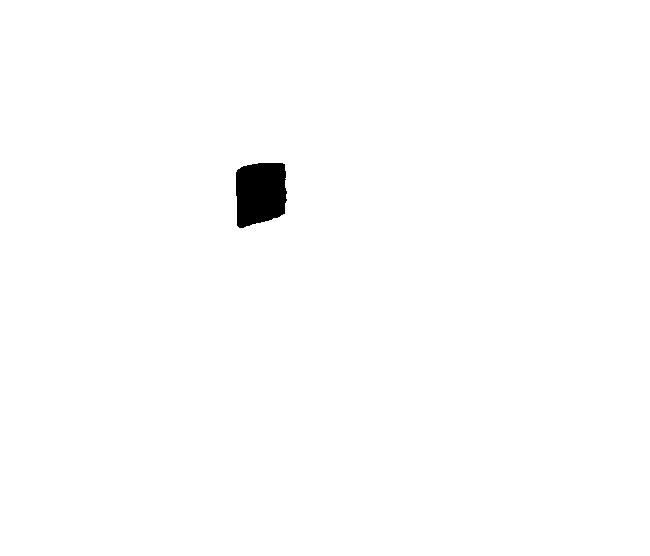

In [21]:
convert_to_bin("straight.png")

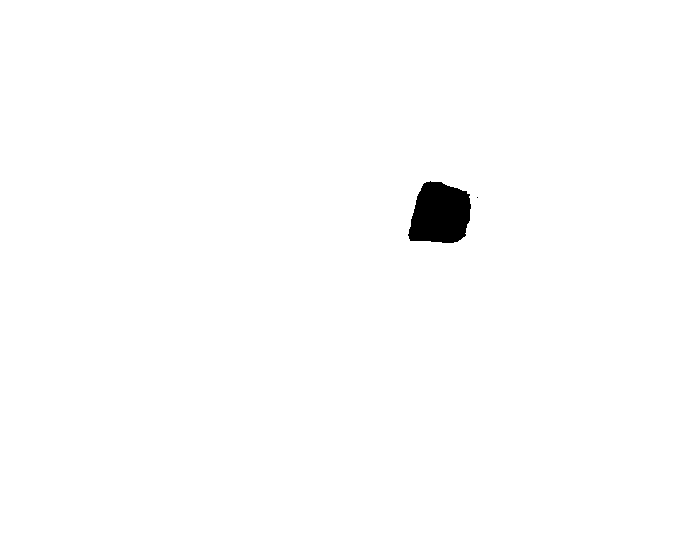

In [22]:
convert_to_bin("bent1.png")

In [23]:
c = convert_to_bin("bent2.png")

In [24]:
d = convert_to_bin("bent2.png")


In [25]:
def pix(pic):
    return np.array(pic.getdata())

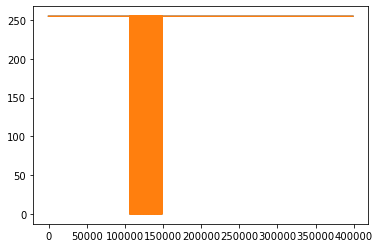

In [27]:
plt.plot(pix(c))
plt.plot(pix(d))

In [29]:
straight = [Image.open("imgs/"+str(i)+".png") for i in range(10,35) if  1<= int(str(i)[1]) <= 4]
bent = [Image.open("imgs/"+str(i)+".png") for i in range(41,70) if  1<= int(str(i)[1]) <= 4]


left = 2000
top = 65
right = 2500
bottom = 700

s_cropped = [i.crop((left,top,right,bottom)) for i in straight]
b_cropped = [i.crop((left,top,right,bottom)) for i in bent]

In [30]:
[convert_to_bin(i).show() for i in b_cropped]

[None, None, None, None, None, None, None, None, None, None, None, None]

## Angle Detector: Attempt 1

In [31]:
import cv2

In [34]:
vid = cv2.VideoCapture("vids/0-1.mp4")
img = vid.read()[1]

i=0
while vid.isOpened():
    cv2.imwrite(str(i)+'.png',vid.read()[1])
    i = i+1

KeyboardInterrupt: 

In [52]:
def vidToFrames(vid,save=True):
    if type(vid) == str:
        vid = cv2.VideoCapture(vid)
    img = vid.read()[1]
    
    if save==True:
        folder = str(datetime.datetime.now())
        os.makedirs(folder)
        i=0
        while vid.isOpened():
            cv2.imwrite(folder+"/"+str(i)+'.png',vid.read()[1])
            i +=1
    return img
    

def get_avg(vid, show=False, save=True):
    if type(vid) == str:
        vid = cv2.VideoCapture(vid)
    frames = vidToFrames(vid,False)
    #print(frames)
    avg = np.zeros((1920,1080))
    for x in range(1920):
        for y in range(1080):
            avg[x][y] = sum([frames[t][x][y] for t in range(1080)])/1080
    #avg = avg.reshape(80,72)
    if show == True:
        #plt.imshow(avg.reshape(80,72))
        plt.imshow(avg)
        plt.show()
    print(len(avg))
    return avg
    

In [53]:
get_avg('vids/1-1.mp4',True)

IndexError: index 3 is out of bounds for axis 0 with size 3

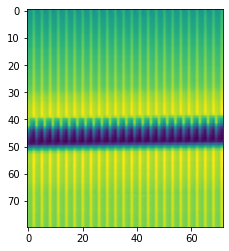

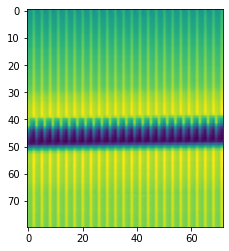

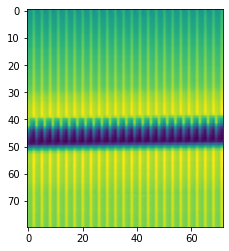

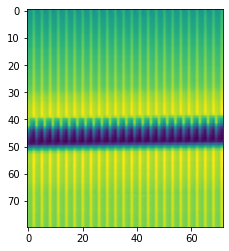

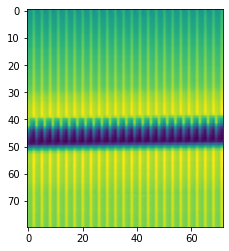

KeyboardInterrupt: 

In [42]:
for i in range(5):
    for j in range(1,4):
        get_avg('vids/1-1.mp4',True)

In [37]:
avg = np.zeros((1920,3))

for x in range(1920):
    for y in range(3):
        avg[x][y] = sum([a[t][x][y] for t in range(1080)])/1080

IndexError: invalid index to scalar variable.

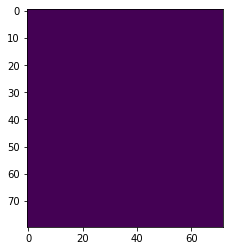

In [38]:
plt.imshow(av g.reshape(80,72))

In [ ]:
get_avg('vids/0-1.mp4',True)

In [ ]:
get_avg('vids/4-3.mp4',True)

In [ ]:
avg = get_avg('vids/4-3.mp4',False)

In [ ]:
avg_bin = convert_to_bin(avg)
plt.imshow(avg_bin.transpose())

In [ ]:
[i for i in range(80) if (avg_bin[i] == np.zeros(72)).all()]

In [ ]:
def get_range(vid,shape=(80,72),show=False):
    avg = convert_to_bin(get_avg(vid),shape=shape)
    if show == True:
        plt.imshow(avg)
        plt.show()
    sub = [i for i in range(10,shape[0]) if (avg[i] == np.zeros(shape[1])).all()]
    res = (sub[0],sub[-1])
    if show == True:
        print(res)
    return res

In [ ]:
get_range('vids/1-3.mp4',show=True)

In [ ]:
for i in range(1,4):
    get_range('vids/1-'+str(i)+'.mp4',show=True)

In [ ]:
plt.imshow()

In [ ]:
new_p = Image.fromarray(data)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')

In [ ]:
new_p.save('gfg_dummy_pic.png')

In [ ]:
data = get_avg('vids/1-1.mp4')

In [ ]:
for i in range(5):
    print("Angle: ",i*5,"°, Range:",get_range('vids/'+str(i)+'-3.mp4',show=False))

In [ ]:
get_range('vids/3-3.mp4',show=True)

In [ ]:
plt.scatter([5*i for i in range(5)], [48,48,47,36,60])